Time vector (first 10 samples): [0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009]


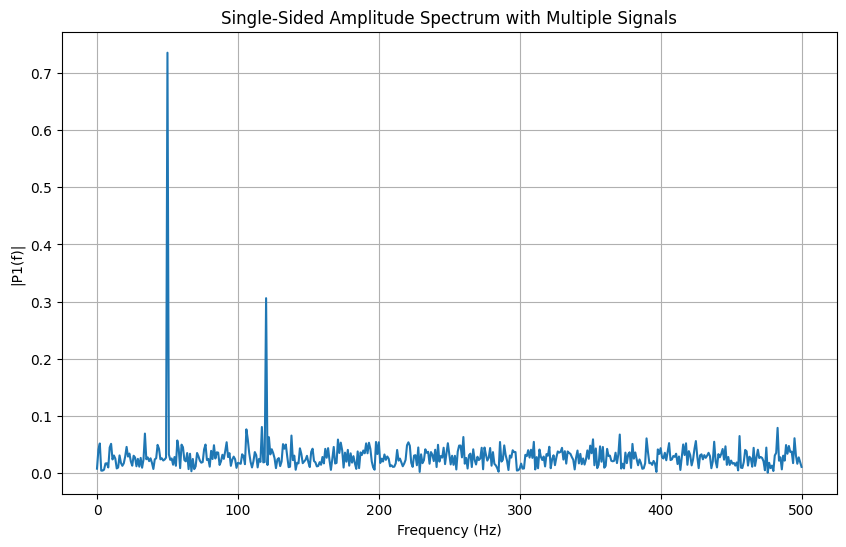

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Signal Parameters
Fs = 1000  # Sampling frequency in Hz
T = 1 / Fs  # Sampling period
L = 1000  # Length of signal
t = np.arange(L) * T  # Time vector
print(f"Time vector (first 10 samples): {t[:10]}")  # Debugging output for time vector

# Frequencies of the sinusoidal signals
f1 = 50   # First signal frequency (Hz)
f2 = 120  # Second signal frequency (Hz)
f3 = 200  # Third signal frequency (Hz)
f4 = 350  # Fourth signal frequency (Hz)

# Create the signal with multiple sinusoids
# Each sinusoid has a different amplitude to make them distinct
signal = 0.7 * np.sin(2 * np.pi * f1 * t) + \
         0.3 * np.sin(2 * np.pi * f2 * t)

# Add Gaussian noise to the signal
signal = signal + 0.5 * np.random.randn(len(t))

# Perform Fast Fourier Transform (FFT)
Y = np.fft.fft(signal)

# Compute the two-sided spectrum
P2 = np.abs(Y / L) # Normalize the FFT output because FFT output is not normalized by default

# Compute the single-sided spectrum
# We take the first half of the P2 spectrum (plus the DC component)
P1 = P2[0:L//2 + 1]

# For the single-sided spectrum, all components except the DC (0 Hz) and
# Nyquist (Fs/2 Hz, if L is even) components need to be multiplied by 2
P1[1:-1] = 2 * P1[1:-1]

# Create the frequency axis for the single-sided spectrum
f = Fs * np.arange(0, L//2 + 1) / L

# Plot the single-sided amplitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(f, P1)
plt.title('Single-Sided Amplitude Spectrum with Multiple Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|P1(f)|')
plt.grid(True)
plt.show()